<a href="https://colab.research.google.com/github/manethportfolio/Data-engineering-HUB/blob/main/NYC_Real_Estate_Pricing_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate Development Projects NYC EDA


The following project is conducted to idenify the

## Data Download

In [24]:
!pip install opendatasets --upgrade --quiet

In [25]:
import opendatasets as od
url = 'https://www.kaggle.com/datasets/anandaramg/apartment-cost-in-new-york-city'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: manethbalasooriya
Your Kaggle Key: ··········


100%|██████████| 1.20M/1.20M [00:00<00:00, 115MB/s]

In [26]:
data_file = './apartment-cost-in-new-york-city/apartment_cost_list.csv'

## Data Preparation and Cleaning
  1. Load the file using Pandas
  2. Scanning through the columns
  3. Fix any missing or incorret values
  

In [27]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv(data_file)

In [7]:
df

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,122923649,MANHATTAN,315,WEST 33RD STREET,757,22,1013552,A2,104,NaN,03/21/2017,$60000.00,0,NaN,NaN,0,C6-4,RENOVATION OF APARTMENTS 8N &amp; 12A. ARCHITE...
19609,121090112,MANHATTAN,110,DUANE STREET,150,22,1001645,A2,101,NaN,07/17/2012,$40000.00,0,NaN,NaN,0,C6-2A,APARTMENT RENVOATION AT APT #4R. DEMOLISH AND ...
19610,102937342,MANHATTAN,166,BANK STREET,638,4,1078335,A2,102,NaN,02/07/2001,$80000.00,0,NaN,NaN,0,C6-2,Interior renovation of an existing apartment. ...
19611,200838558,BRONX,2762,KINGSBRIDGE TERRACE,3253,90,2015521,A2,208,NaN,NaN,$40000.00,0,NaN,NaN,0,R6,Proposed to renovate existing apartments. No c...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19613 entries, 0 to 19612
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job #                   19613 non-null  int64 
 1   Borough                 19613 non-null  object
 2   House #                 19613 non-null  object
 3   Street Name             19613 non-null  object
 4   Block                   19613 non-null  int64 
 5   Lot                     19613 non-null  int64 
 6   Bin #                   19613 non-null  int64 
 7   Job Type                19613 non-null  object
 8   Community - Board       19613 non-null  int64 
 9   Curb Cut                16 non-null     object
 10  Fully Permitted         15625 non-null  object
 11  Initial Cost            19613 non-null  object
 12  Proposed Zoning Sqft    19613 non-null  int64 
 13  Horizontal Enlrgmt      163 non-null    object
 14  Vertical Enlrgmt        242 non-null    object
 15  En

In [10]:
df.describe()

,Job #,Block,Lot,Bin #,Community - Board,Proposed Zoning Sqft,Enlargement SQ Footage
count,1.961300e+04,19613.000000,19613.000000,1.961300e+04,19613.000000,19613.000000,19613.000000
mean,1.624266e+08,1551.725794,1261.811197,1.506365e+06,151.269005,719.625809,18.639219
std,9.157722e+07,1550.780753,2764.626109,9.319992e+05,90.115653,10859.926278,303.278381
min,1.021331e+08,0.000000,0.000000,1.000043e+06,101.000000,0.000000,0.000000
25%,1.048244e+08,816.000000,17.000000,1.028758e+06,105.000000,0.000000,0.000000
50%,1.217112e+08,1245.000000,36.000000,1.046983e+06,107.000000,0.000000,0.000000
75%,1.408258e+08,1576.000000,66.000000,1.084564e+06,111.000000,0.000000,0.000000
max,5.401803e+08,16278.000000,9007.000000,5.860016e+06,503.000000,724475.000000,29687.000000


In [11]:
df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...


In [15]:
# Null values per column | Percentage of null values and sort in descending order
missing_percents = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percents

Curb Cut                  0.999184
Horizontal Enlrgmt        0.991689
Vertical Enlrgmt          0.987661
Fully Permitted           0.203335
Zoning Dist1              0.106868
Borough                   0.000000
Enlargement SQ Footage    0.000000
Proposed Zoning Sqft      0.000000
Initial Cost              0.000000
Job #                     0.000000
Community - Board         0.000000
Job Type                  0.000000
Bin #                     0.000000
Lot                       0.000000
Block                     0.000000
Street Name               0.000000
House #                   0.000000
Job Description           0.000000
dtype: float64

<Axes: >

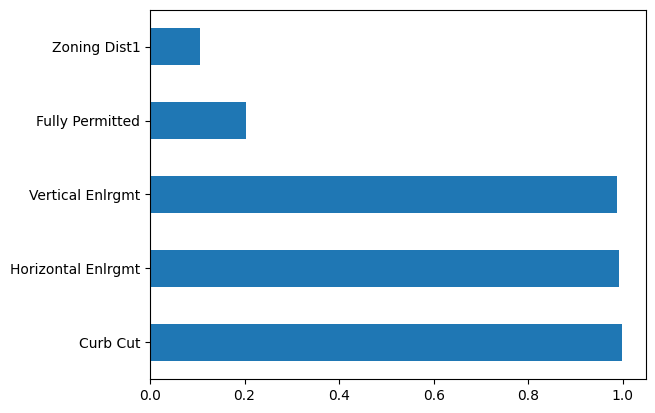

In [16]:
missing_percents[missing_percents != 0].plot(kind='barh')

In [17]:
df.isnull().sum()

Job #                         0
Borough                       0
House #                       0
Street Name                   0
Block                         0
Lot                           0
Bin #                         0
Job Type                      0
Community - Board             0
Curb Cut                  19597
Fully Permitted            3988
Initial Cost                  0
Proposed Zoning Sqft          0
Horizontal Enlrgmt        19450
Vertical Enlrgmt          19371
Enlargement SQ Footage        0
Zoning Dist1               2096
Job Description               0
dtype: int64

# Remove the unnecessary columns and organize the missing value columns

COnditions I go by checking before modificiation

  1. MCAR - Solely independent
  2. MAR - Codependednt
  3. MNAR - Missing with a reasoning


In [64]:
# The column will retain but all the null values will be removed including the whole record for that null value

# For any value without a given zoning district can be removed to improve the reliability of
df.dropna(subset=['Zoning Dist1'], inplace=True) # Zoning Dist types are of three C, R, M

# Finding replacements for those null values
df['Fully Permitted'].fillna("Not yet permitted", inplace=True)

# The whole column can be taken out
# df.drop(['Curb cut], axis=1,inplace=True) //Initally removed
df.drop(['Job #'], axis=1, inplace=True )


In [65]:
df.isnull().sum()

Borough                       0
House #                       0
Street Name                   0
Block                         0
Lot                           0
Bin #                         0
Job Type                      0
Community - Board             0
Curb Cut                  17501
Fully Permitted               0
Initial Cost                  0
Proposed Zoning Sqft          0
Horizontal Enlrgmt        17355
Vertical Enlrgmt          17277
Enlargement SQ Footage        0
Zoning Dist1                  0
Job Description               0
dtype: int64

In [66]:
df

,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,Not yet permitted,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
4,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...
5,BROOKLYN,501,HICKS STREET,321,7501,3003731,A2,306,NaN,12/12/2005,$40000.00,0,NaN,NaN,0,R6,ERECTION OF MEZZANINE IN EXISTING APARTMENT #4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,MANHATTAN,315,WEST 33RD STREET,757,22,1013552,A2,104,NaN,03/21/2017,$60000.00,0,NaN,NaN,0,C6-4,RENOVATION OF APARTMENTS 8N &amp; 12A. ARCHITE...
19609,MANHATTAN,110,DUANE STREET,150,22,1001645,A2,101,NaN,07/17/2012,$40000.00,0,NaN,NaN,0,C6-2A,APARTMENT RENVOATION AT APT #4R. DEMOLISH AND ...
19610,MANHATTAN,166,BANK STREET,638,4,1078335,A2,102,NaN,02/07/2001,$80000.00,0,NaN,NaN,0,C6-2,Interior renovation of an existing apartment. ...
19611,BRONX,2762,KINGSBRIDGE TERRACE,3253,90,2015521,A2,208,NaN,Not yet permitted,$40000.00,0,NaN,NaN,0,R6,Proposed to renovate existing apartments. No c...


In [67]:
df['Horizontal Enlrgmt'].fillna('0', inplace=True)
df['Vertical Enlrgmt'].fillna('0', inplace=True)

In [68]:
df.isnull().sum()

Borough                       0
House #                       0
Street Name                   0
Block                         0
Lot                           0
Bin #                         0
Job Type                      0
Community - Board             0
Curb Cut                  17501
Fully Permitted               0
Initial Cost                  0
Proposed Zoning Sqft          0
Horizontal Enlrgmt            0
Vertical Enlrgmt              0
Enlargement SQ Footage        0
Zoning Dist1                  0
Job Description               0
dtype: int64

In [69]:
df

,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,Not yet permitted,$65000.00,0,0,0,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,0,0,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,0,0,0,R6,Change existing four story and basement brick ...
4,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,0,0,0,C4-3,New C of O for existing building. New duplex a...
5,BROOKLYN,501,HICKS STREET,321,7501,3003731,A2,306,NaN,12/12/2005,$40000.00,0,0,0,0,R6,ERECTION OF MEZZANINE IN EXISTING APARTMENT #4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,MANHATTAN,315,WEST 33RD STREET,757,22,1013552,A2,104,NaN,03/21/2017,$60000.00,0,0,0,0,C6-4,RENOVATION OF APARTMENTS 8N &amp; 12A. ARCHITE...
19609,MANHATTAN,110,DUANE STREET,150,22,1001645,A2,101,NaN,07/17/2012,$40000.00,0,0,0,0,C6-2A,APARTMENT RENVOATION AT APT #4R. DEMOLISH AND ...
19610,MANHATTAN,166,BANK STREET,638,4,1078335,A2,102,NaN,02/07/2001,$80000.00,0,0,0,0,C6-2,Interior renovation of an existing apartment. ...
19611,BRONX,2762,KINGSBRIDGE TERRACE,3253,90,2015521,A2,208,NaN,Not yet permitted,$40000.00,0,0,0,0,R6,Proposed to renovate existing apartments. No c...


# Exploratory analysis and Visualization




Identfying, dissecting and grouping the data according to the given functionality


Filtering out outliers

  1. Univariate analysis - Values beyond the expected range
  2. Bivariate abalysis -
  3. Multivariate analysis - Values beyond the range only when incorporated with another variable



In [70]:
df.columns

Index(['Borough', 'House #', 'Street Name', 'Block', 'Lot', 'Bin #',
       'Job Type', 'Community - Board', 'Curb Cut', 'Fully Permitted',
       'Initial Cost', 'Proposed Zoning Sqft', 'Horizontal Enlrgmt',
       'Vertical Enlrgmt', 'Enlargement SQ Footage', 'Zoning Dist1',
       'Job Description'],
      dtype='object')

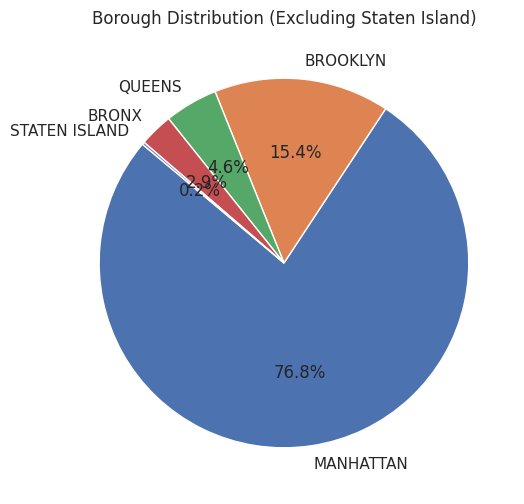

In [153]:
# What Boroughs in the NY state are we looking into and the count per Borough

# Create a modified DataFrame without 'Staten Island'
df_filtered = df[df['Borough'] != 'Staten Island']

# Calculate the counts per Borough from the filtered DataFrame
borough_counts = df_filtered['Borough'].value_counts()

# Get the unique Boroughs
boroughs = borough_counts.index

# Create a pie chart with percentages inside slices
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed

# Add percentages inside the slices using the autopct parameter
plt.pie(borough_counts, labels=boroughs, autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Borough Distribution (Excluding Staten Island)')

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

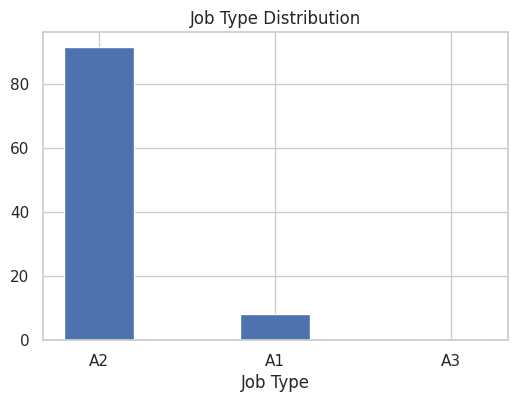

In [72]:

# Job types

# Calculate the percentages of each job type
job_percentages = (df['Job Type'].value_counts(normalize=True) * 100).round(2)

# Get the unique job types
job_types = job_percentages.index

# Clear the current figure to remove old bars (if any)
plt.clf()

# Create the bar graph with a reduced width
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed (6 inches wide and 4 inches high in this example)
plt.bar(job_types, job_percentages, width=0.4)  # Adjust the width as needed (e.g., 0.4 for narrower bars)

# Adding labels and title
plt.xlabel('Job Type')
plt.title('Job Type Distribution')

# Show the plot
plt.show()



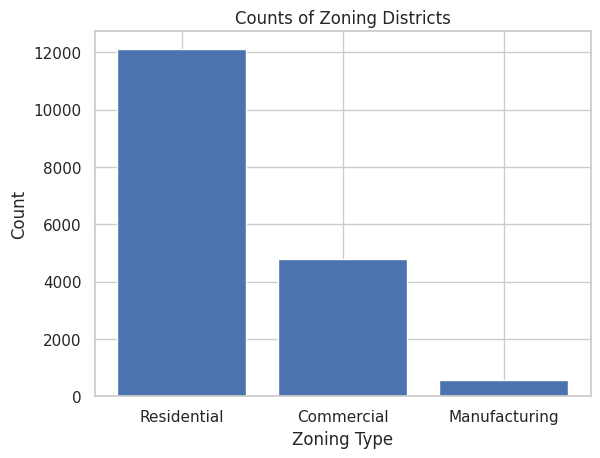

In [73]:
# Zoning Districts NY where these projects are noted on

# Three unique zones
df['Zone'] = df['Zoning Dist1'].str[0]

# Map first letters to corresponding labels
labels = {'C': 'Commercial', 'R': 'Residential', 'M': 'Manufacturing'}
df['Zoning Labels'] = df['Zone'].map(labels)

# Count the unique values
counts = df['Zoning Labels'].value_counts()

# Create a bar graph
plt.bar(counts.index, counts.values)

# Add labels and a title
plt.xlabel('Zoning Type')
plt.ylabel('Count')
plt.title('Counts of Zoning Districts')
plt.subplots_adjust(bottom=0.12)  # Adjusts the position of the labels

# Show the bar graph
plt.show()


In [74]:
df


,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description,Zone,Zoning Labels
0,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,Not yet permitted,$65000.00,0,0,0,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...,C,Commercial
1,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,0,0,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...,R,Residential
2,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,0,0,0,R6,Change existing four story and basement brick ...,R,Residential
4,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,0,0,0,C4-3,New C of O for existing building. New duplex a...,C,Commercial
5,BROOKLYN,501,HICKS STREET,321,7501,3003731,A2,306,NaN,12/12/2005,$40000.00,0,0,0,0,R6,ERECTION OF MEZZANINE IN EXISTING APARTMENT #4...,R,Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,MANHATTAN,315,WEST 33RD STREET,757,22,1013552,A2,104,NaN,03/21/2017,$60000.00,0,0,0,0,C6-4,RENOVATION OF APARTMENTS 8N &amp; 12A. ARCHITE...,C,Commercial
19609,MANHATTAN,110,DUANE STREET,150,22,1001645,A2,101,NaN,07/17/2012,$40000.00,0,0,0,0,C6-2A,APARTMENT RENVOATION AT APT #4R. DEMOLISH AND ...,C,Commercial
19610,MANHATTAN,166,BANK STREET,638,4,1078335,A2,102,NaN,02/07/2001,$80000.00,0,0,0,0,C6-2,Interior renovation of an existing apartment. ...,C,Commercial
19611,BRONX,2762,KINGSBRIDGE TERRACE,3253,90,2015521,A2,208,NaN,Not yet permitted,$40000.00,0,0,0,0,R6,Proposed to renovate existing apartments. No c...,R,Residential


In [75]:
#Removinf the Bin # column
df.drop(['Bin #'], axis=1, inplace=True)

In [76]:
df

,Borough,House #,Street Name,Block,Lot,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description,Zone,Zoning Labels
0,MANHATTAN,1598,2ND AVENUE,1545,49,A2,108,NaN,Not yet permitted,$65000.00,0,0,0,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...,C,Commercial
1,MANHATTAN,160,E 89 ST,1517,43,A2,108,NaN,07/14/2020,$85000.00,0,0,0,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...,R,Residential
2,BROOKLYN,65,GATES AVENUE,1962,86,A1,302,NaN,05/23/2007,$60000.00,0,0,0,0,R6,Change existing four story and basement brick ...,R,Residential
4,BROOKLYN,154,NOBLE STREET,2573,10,A1,301,NaN,09/29/2006,$40000.00,0,0,0,0,C4-3,New C of O for existing building. New duplex a...,C,Commercial
5,BROOKLYN,501,HICKS STREET,321,7501,A2,306,NaN,12/12/2005,$40000.00,0,0,0,0,R6,ERECTION OF MEZZANINE IN EXISTING APARTMENT #4...,R,Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,MANHATTAN,315,WEST 33RD STREET,757,22,A2,104,NaN,03/21/2017,$60000.00,0,0,0,0,C6-4,RENOVATION OF APARTMENTS 8N &amp; 12A. ARCHITE...,C,Commercial
19609,MANHATTAN,110,DUANE STREET,150,22,A2,101,NaN,07/17/2012,$40000.00,0,0,0,0,C6-2A,APARTMENT RENVOATION AT APT #4R. DEMOLISH AND ...,C,Commercial
19610,MANHATTAN,166,BANK STREET,638,4,A2,102,NaN,02/07/2001,$80000.00,0,0,0,0,C6-2,Interior renovation of an existing apartment. ...,C,Commercial
19611,BRONX,2762,KINGSBRIDGE TERRACE,3253,90,A2,208,NaN,Not yet permitted,$40000.00,0,0,0,0,R6,Proposed to renovate existing apartments. No c...,R,Residential


# Spotting outliers and building on the dataset

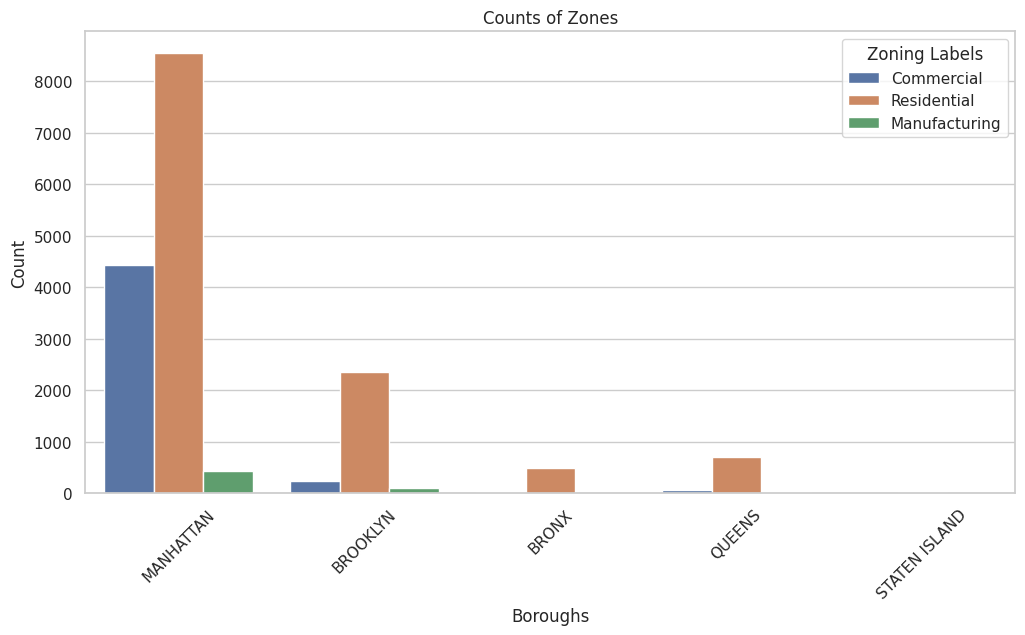

In [91]:
# The number of zone counts per each borough

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Create a countplot for the first 20 records
sns.countplot(data=df, x='Borough', hue='Zoning Labels')

# Adding labels and a title
plt.xlabel('Boroughs')
plt.ylabel('Count')
plt.title('Counts of Zones')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

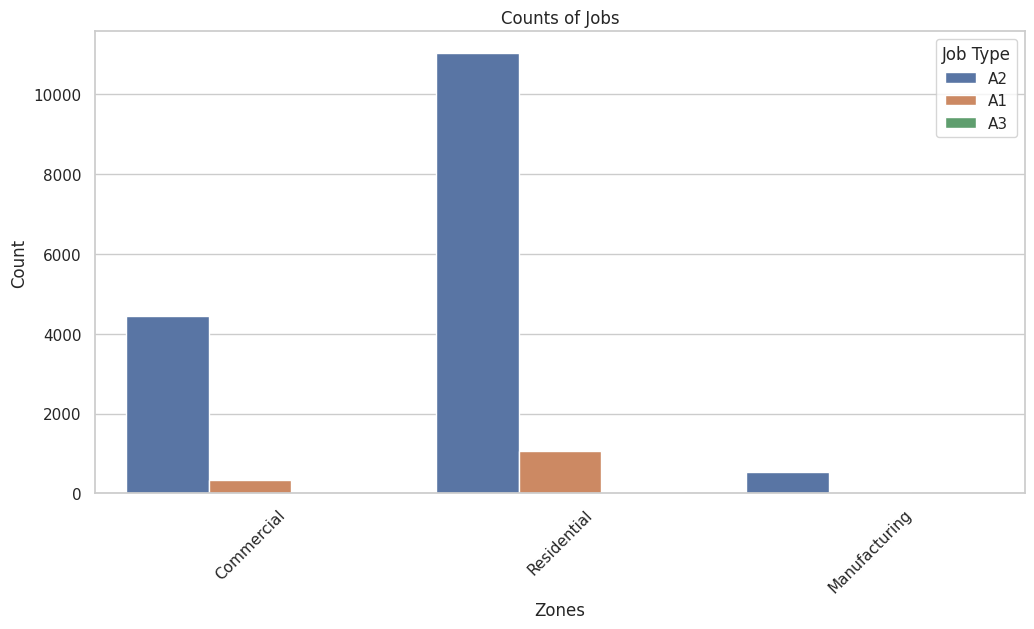

In [125]:
# The number of zone counts per each borough

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Create a countplot for the first 20 records
sns.countplot(data=df, x='Zoning Labels', hue='Job Type')

# Adding labels and a title
plt.xlabel('Zones')
plt.ylabel('Count')
plt.title('Counts of Jobs')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


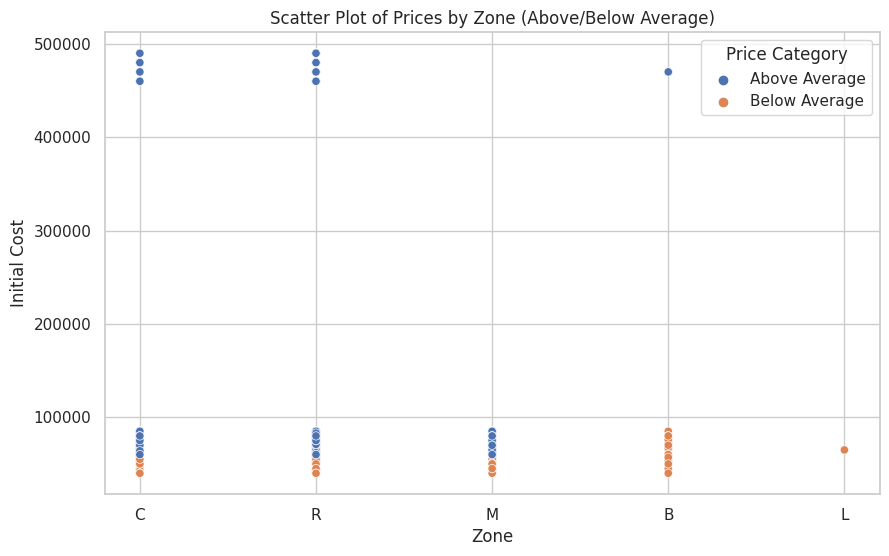

In [163]:
# Convert the 'Initial Cost' column to strings
df['Initial Cost'] = df['Initial Cost'].astype(str)

# Clean the 'Initial Cost' column and convert it to numeric
df['Initial Cost'] = df['Initial Cost'].str.replace(',', '', regex=True).astype(float)

# Calculate the average cost for each zone
df['Average Cost by Zone'] = df.groupby('Zone')['Initial Cost'].transform('mean')

# Create a new column to label prices as above or below average
df['Price Category'] = np.where(df['Initial Cost'] > df['Average Cost by Zone'], 'Above Average', 'Below Average')

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of prices by zone with color based on the 'Price Category' column
sns.scatterplot(data=df, x='Zone', y='Initial Cost', hue='Price Category')

plt.title('Scatter Plot of Prices by Zone (Above/Below Average)')
plt.xlabel('Zone')
plt.ylabel('Initial Cost')
plt.legend(title='Price Category')

plt.show()

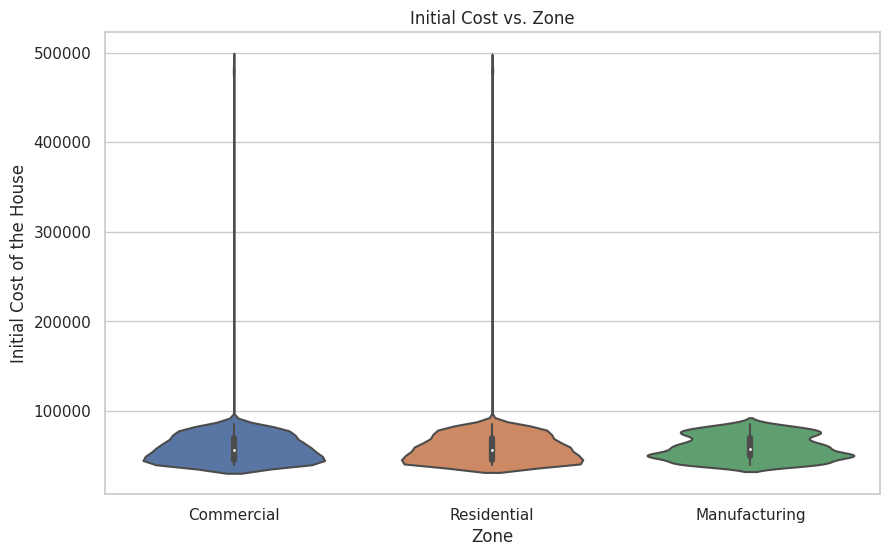

In [139]:

# Create a scatter plot for each zone
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.violinplot(data=df, x='Zoning Labels', y='Initial Cost')

# Adding labels and a title
plt.xlabel('Zone')
plt.ylabel('Initial Cost of the House')
plt.title('Initial Cost vs. Zone')

# Show the plot
plt.show()

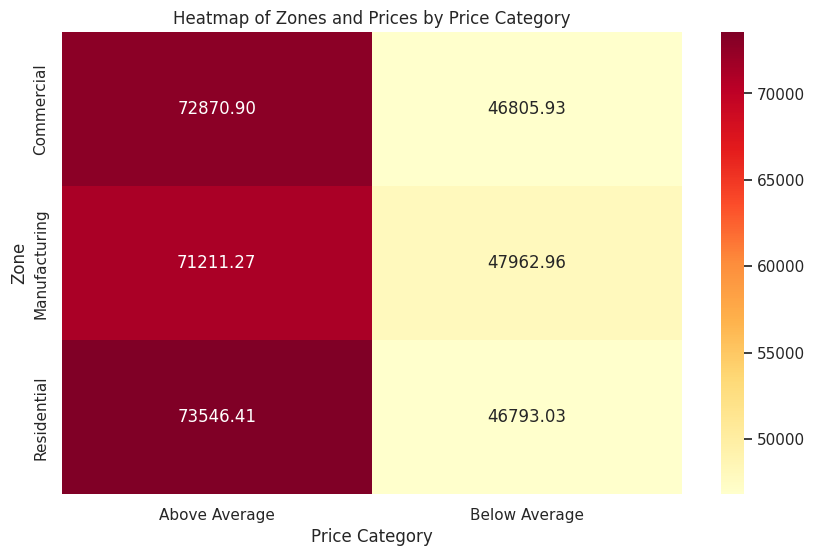

In [156]:
# Create a pivot table to calculate the average price by zone
heatmap_data = df.pivot_table(index='Zoning Labels', columns='Price Category', values='Initial Cost', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.2f', cbar=True)

# Add labels and title
plt.xlabel('Price Category')
plt.ylabel('Zone')
plt.title('Heatmap of Zones and Prices by Price Category')

plt.show()

# Summary and Conclusions

***-- Executive Summary:***

This report presents an analysis of property renovations in New York State based on a comprehensive dataset. The dataset provides insights into the boroughs, job types, zoning, average prices, and more related to property renovations. The analysis aims to provide a deeper understanding of property renovations in New York and uncover key trends and patterns.

*----> Key Findings:*

Borough Analysis: **bold text**

Most house renovations reported are from the Manhattan borough, with the highest number of records.
In contrast, the Staten Island borough has the least number of renovation records.

**Job Type Analysis:**

The analysis reveals that "A2" job types, which primarily involve interior renovations, are the most frequently conducted renovations.
"A1" job types, indicating major structural changes, are also quite common in property renovations.

**Zoning Analysis:**

The dataset classifies New York State properties under three main zones: Commercial, Residential, and Manufacturing.
The majority of property renovations are conducted in Residential zones.

**Borough vs. Residential Zones:**

When examining property renovations in Residential zones by boroughs, Manhattan Residential zones collectively report the highest number of records.

**Job Type vs. Zones:**

The analysis also identifies that the highest number of "A2" type jobs are conducted in residential zones.

**Average Price Distribution:**

The average price for properties typically ranges below 10,000
Outliers are present, indicating higher renovation costs for some properties.

**Violin Plot Analysis:**

Violin plots demonstrate that the spread of data is more pronounced for Residential and Commercial zones.
The median, in most cases, lies within the 10,000 range.

From both violin plot and the scatter plot mostly commercial properties and some resedential properties have the outlier price tags on them

**Heat Map Analysis:**

The heat map reveals that commercial properties typically have a higher initial cost for renovations.
This trend coincides with the understanding that major renovations for larger square footage areas tend to be more costly.

**Recommendations:**

The analysis provides valuable insights into property renovations in New York State. Based on the findings, we recommend that stakeholders pay close attention to the variations in renovation costs, especially in different boroughs and zones. Further, understanding the popularity of specific job types can guide planning for renovation services.

**Conclusion:**

This analysis offers a comprehensive overview of property renovations in New York State, revealing patterns and trends that can inform decision-making for property owners, contractors, and policymakers. It is crucial to keep an eye on cost considerations and popular job types in different areas of New York, which can be valuable for future property renovation projects.

The insights gained from this report will be essential for making informed decisions about property renovations in the region. For further analyses or specific questions, please don't hesitate to reach out for additional assistance and guidance.